In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("log.txt") as file:
    rows = [row.strip().split(",") for row in file]

In [3]:
times = []
for row in rows:
    if row[0] == "time":
        times.append(float(row[1]))

In [4]:
validation_step = 2

Mean Time per Epoch: 3215.678013033867


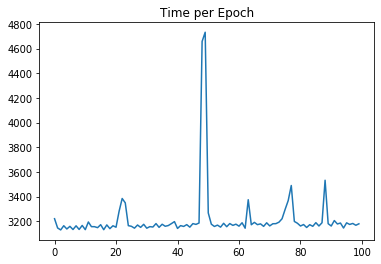

In [5]:
epoch_times = [times[i] - times[i-1] for i in range(1, len(times)) if i % (validation_step + 1) != validation_step]
print("Mean Time per Epoch:", np.mean(epoch_times))

plt.plot(range(len(epoch_times)), epoch_times)
plt.title("Time per Epoch")
plt.show()

Mean Time per Validation: 133.23957570552827


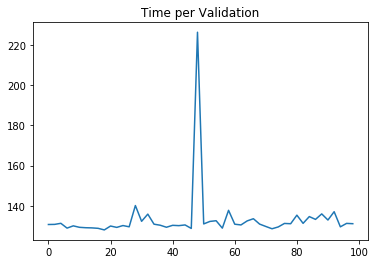

In [6]:
val_times = [times[i] - times[i-1] for i in range(1, len(times)) if i % (validation_step + 1) == validation_step]
print("Mean Time per Validation:", np.mean(val_times))

plt.plot(range(0, validation_step*len(val_times), validation_step), val_times)
plt.title("Time per Validation")
plt.show()

## Losses

In [7]:
losses = [[]]
for row in rows:
    if row[0].isdigit():
        losses[-1].append(float(row[2]))
        
    elif len(losses[-1]) > 0:
        losses.append([])

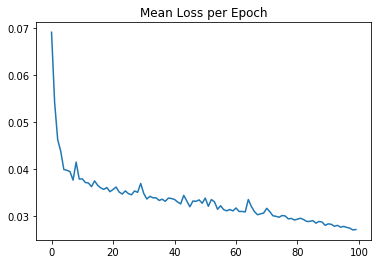

In [8]:
mean_loss_per_epoch = np.mean(losses[:-1], axis=-1)
plt.plot(range(len(mean_loss_per_epoch)), mean_loss_per_epoch)
plt.title("Mean Loss per Epoch")
plt.show()

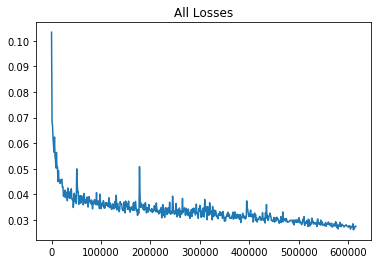

In [9]:
all_losses = [loss for l in losses for loss in l]
group = 1000
all_losses = [np.mean(all_losses[i:i+group]) for i in range(0, len(all_losses), group)]
plt.plot(range(0, group*len(all_losses), group), all_losses)
plt.title("All Losses")
plt.show()

## Precision

In [10]:
precisions = []
for row in rows:
    if row[0] == "precision":
        precisions.append(float(row[2]))
        
print("Mean Precision:".ljust(20), np.mean(precisions))
print("Max Precision:".ljust(20), np.max(precisions), "at", np.argmax(precisions) * 2)
print("Min Precision:".ljust(20), np.min(precisions), "at", np.argmin(precisions) * 2)

Mean Precision:      0.9900187115293559
Max Precision:       0.9916459332767927 at 72
Min Precision:       0.9884700255256895 at 26


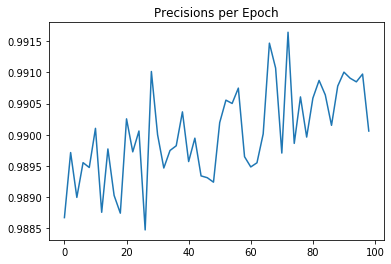

In [11]:
plt.plot(range(0, len(precisions) * 2, 2), precisions)
plt.title("Precisions per Epoch")
plt.show()

## MIoU

In [12]:
mious = []
for row in rows:
    if row[0].endswith("miou"):
        mious.append(float(row[2]))
        
print("Mean IoU:".ljust(15), np.mean(mious))
print("Max IoU:".ljust(15), np.max(mious), "at", np.argmax(mious) * 2)
print("Min IoU:".ljust(15), np.min(mious), "at", np.argmin(mious) * 2)

Mean IoU:       0.36080339090493707
Max IoU:        0.44754292152169517 at 92
Min IoU:        0.27543377335693 at 0


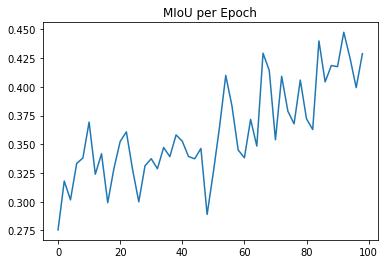

In [13]:
plt.plot(range(0, len(mious) * 2, 2), mious)
plt.title("MIoU per Epoch")
plt.show()

In [14]:
import torch
import os

In [15]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0,1"

In [16]:
torch.cuda.device_count()

2

In [17]:
torch.cuda.get_device_name(1)

'GeForce GTX 1080'